In [139]:
import pandas as pd
import matplotlib
import seaborn
import pysam
import numpy as np

from collections import Counter, defaultdict
import glob
%matplotlib inline

In [4]:
bam_file = pysam.AlignmentFile('../../CONCOCT-test-data/map/Sample118_s1e5_R1.fa/bowtie2/asm_pair-smds.bam')

In [33]:
bam_file2 = pysam.AlignmentFile('../../CONCOCT-test-data/map/Sample120_s1e5_R1.fa/bowtie2/asm_pair-smds.bam')

In [161]:
species_df = pd.read_table('../../CONCOCT-test-data/evaluation-output/clustering_gt1000_s.csv', sep=',', names=['contig', 'species'], index_col=0)

In [165]:
species_d = species_df.to_dict()['species']

In [166]:
results_median = defaultdict(dict)
results_mean = defaultdict(dict)
results_std = defaultdict(dict)
for sample_bam in glob.glob('../../CONCOCT-test-data/map/Sample1*/bowtie2/asm_pair-smds.bam'):
    sample_name = sample_bam.split('/')[4]
    print(sample_name)
    bam_file = pysam.AlignmentFile(sample_bam)
    for reference in bam_file.header['SQ']:
        if reference['LN'] < 1000:
            continue
        cov_arrays = bam_file.count_coverage(reference=reference['SN'], start=0, end=reference['LN']-1)
        values = np.sum(cov_arrays, axis=0)
        results_median[reference['SN']][sample_name] = np.median(values)
        results_mean[reference['SN']][sample_name] = np.mean(values)
        results_std[reference['SN']][sample_name] = np.std(values)
        results_median[reference['SN']]['species'] = species_d[reference['SN']]
        results_mean[reference['SN']]['species'] = species_d[reference['SN']]
        results_std[reference['SN']]['species'] = species_d[reference['SN']]

Sample118_s1e5_R1.fa
Sample120_s1e5_R1.fa
Sample127_s1e5_R1.fa
Sample134_s1e5_R1.fa
Sample177_s1e5_R1.fa


In [167]:
std_df = pd.DataFrame.from_dict(results_std, orient='index')

In [169]:
std_df.head()

,Sample118_s1e5_R1.fa,Sample120_s1e5_R1.fa,species,Sample134_s1e5_R1.fa,Sample127_s1e5_R1.fa,Sample177_s1e5_R1.fa
NODE_100_length_1535_cov_6.691205,4.255796,0.446830,gi|325278757|ref|NC_015160.1|_Odoribacter_spla...,0.329656,4.558960,0.0
NODE_103_length_20202_cov_8.395357.0,1.614465,2.108900,gi|390945347|ref|NC_018011.1|_Alistipes_finego...,0.529743,1.770056,0.0
NODE_103_length_20202_cov_8.395357.1,1.399502,1.923922,gi|390945347|ref|NC_018011.1|_Alistipes_finego...,0.833543,2.073972,0.0
NODE_106_length_2172_cov_16.183702,1.851844,3.200571,gi|390945347|ref|NC_018011.1|_Alistipes_finego...,0.000000,2.223600,0.0
NODE_107_length_7609_cov_8.569195,1.286614,2.009096,gi|390945347|ref|NC_018011.1|_Alistipes_finego...,0.000000,1.754503,0.0


gi|390945347|ref|NC_018011.1|_Alistipes_finegoldii_DSM_17242
Sample118_s1e5_R1.fa    0.716166
Sample120_s1e5_R1.fa    1.482910
Sample134_s1e5_R1.fa    0.190625
Sample127_s1e5_R1.fa    1.091418
Sample177_s1e5_R1.fa    0.000000
dtype: float64
gi|479170689|ref|NC_021020.1|_Faecalibacterium_prausnitzii_SL3/3
Sample118_s1e5_R1.fa    0.175478
Sample120_s1e5_R1.fa    0.035902
Sample134_s1e5_R1.fa    0.044397
Sample127_s1e5_R1.fa    0.123280
Sample177_s1e5_R1.fa    0.356488
dtype: float64


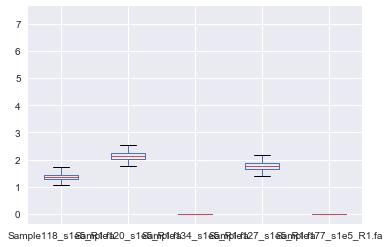

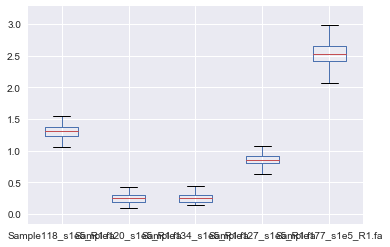

In [186]:
for species, spec_df in std_df.groupby('species'):
    if len(spec_df) <= 2:
        continue
    print(species)
    spec_df.plot.box()
    print(mean_df[mean_df['species'] == species].std())

In [ ]:
import matplotlib.pyplot as plt
import numpy.random as rnd
from matplotlib.patches import Ellipse

NUM = 250

ells = [Ellipse(xy=rnd.rand(2)*10, width=rnd.rand(), height=rnd.rand(), angle=rnd.rand()*360)
        for i in range(NUM)]

fig = plt.figure(0)
ax = fig.add_subplot(111, aspect='equal')
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(rnd.rand())
    e.set_facecolor(rnd.rand(3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()

In [194]:
matplotlib.patches.Ellipse?

In [198]:
results_std

defaultdict(dict,
            {'NODE_100_length_1535_cov_6.691205': {'Sample118_s1e5_R1.fa': 4.2557961468919334,
              'Sample120_s1e5_R1.fa': 0.44682963034331696,
              'Sample127_s1e5_R1.fa': 4.5589600036165221,
              'Sample134_s1e5_R1.fa': 0.32965550791816622,
              'Sample177_s1e5_R1.fa': 0.0,
              'species': 'gi|325278757|ref|NC_015160.1|_Odoribacter_splanchnicus_DSM_20712'},
             'NODE_103_length_20202_cov_8.395357.0': {'Sample118_s1e5_R1.fa': 1.614465308881468,
              'Sample120_s1e5_R1.fa': 2.1089004546803385,
              'Sample127_s1e5_R1.fa': 1.7700563292027505,
              'Sample134_s1e5_R1.fa': 0.52974278917061379,
              'Sample177_s1e5_R1.fa': 0.0,
              'species': 'gi|390945347|ref|NC_018011.1|_Alistipes_finegoldii_DSM_17242'},
             'NODE_103_length_20202_cov_8.395357.1': {'Sample118_s1e5_R1.fa': 1.3995019171330585,
              'Sample120_s1e5_R1.fa': 1.9239216514857793,
             

In [201]:
results_mean['NODE_64_length_358694_cov_6.830965.0']

{'Sample118_s1e5_R1.fa': 1.4879487948794881,
 'Sample120_s1e5_R1.fa': 0.059005900590059009,
 'Sample127_s1e5_R1.fa': 0.68906890689068911,
 'Sample134_s1e5_R1.fa': 0.020002000200020003,
 'Sample177_s1e5_R1.fa': 6.3039303930393036,
 'species': 'gi|479170689|ref|NC_021020.1|_Faecalibacterium_prausnitzii_SL3/3'}

In [202]:
results_std['NODE_64_length_358694_cov_6.830965.0']

{'Sample118_s1e5_R1.fa': 1.2690117501664451,
 'Sample120_s1e5_R1.fa': 0.23563574492342002,
 'Sample127_s1e5_R1.fa': 0.83408698183201568,
 'Sample134_s1e5_R1.fa': 0.14000685764639673,
 'Sample177_s1e5_R1.fa': 2.4640500619561565,
 'species': 'gi|479170689|ref|NC_021020.1|_Faecalibacterium_prausnitzii_SL3/3'}

(0, 20)

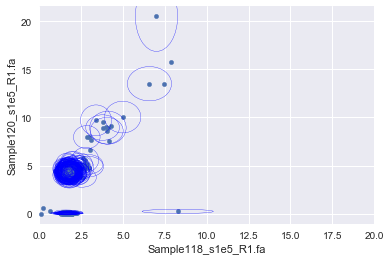

In [207]:
sample_x = 'Sample118_s1e5_R1.fa'
sample_y = 'Sample120_s1e5_R1.fa'
ells = []
for contig_id, row in mean_df.iterrows():
    el = matplotlib.patches.Ellipse(xy=(row[sample_x], row[sample_y]),
                                    width=results_std[contig_id][sample_x],
                                    height=results_std[contig_id][sample_y], angle=0.0, facecolor='none', edgecolor='b')
    ells.append(el)
ax = mean_df[[sample_x, sample_y]].plot.scatter(x=sample_x, y=sample_y)
for i,el in enumerate(ells):
    if i>150:
        break
    ax.add_artist(el)
ax.set_xlim(0,20)

368 gi|390945347|ref|NC_018011.1|_Alistipes_finegoldii_DSM_17242
312 gi|479170689|ref|NC_021020.1|_Faecalibacterium_prausnitzii_SL3/3


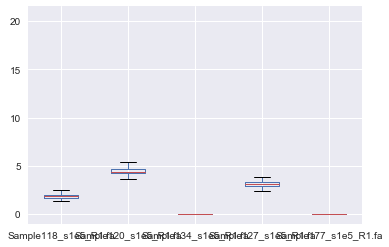

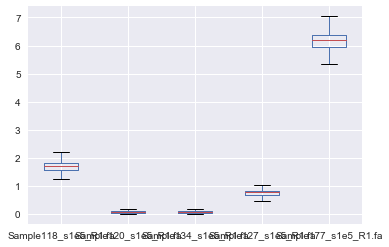

In [185]:
for species, spec_df in mean_df.groupby('species'):
    if len(spec_df) <= 2:
        continue
    print(len(spec_df), species)
    spec_df.plot.box()

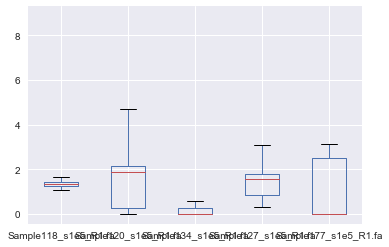

In [175]:
std_df.plot.box(by='species')

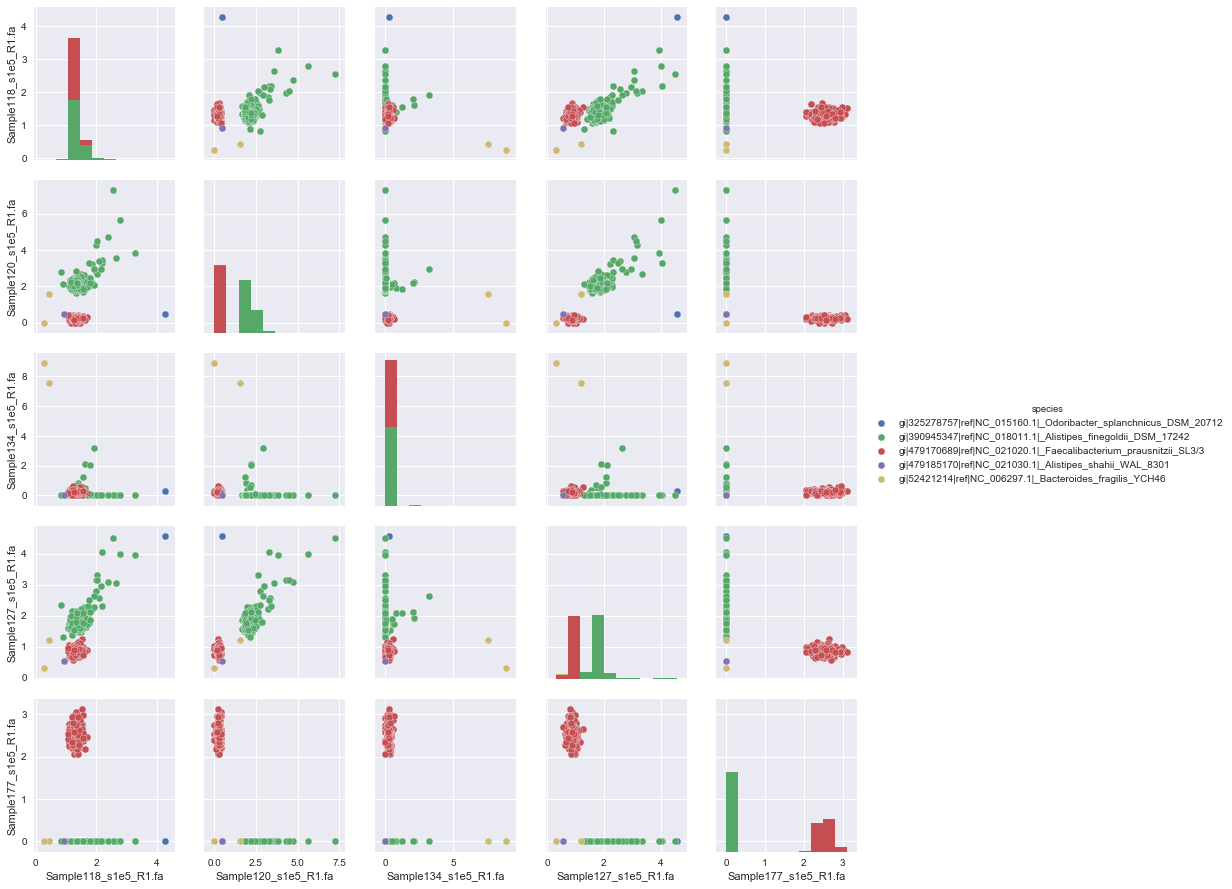

In [170]:
seaborn.pairplot(std_df, hue='species')

In [179]:
mean_df = pd.DataFrame.from_dict(results_mean, orient='index')

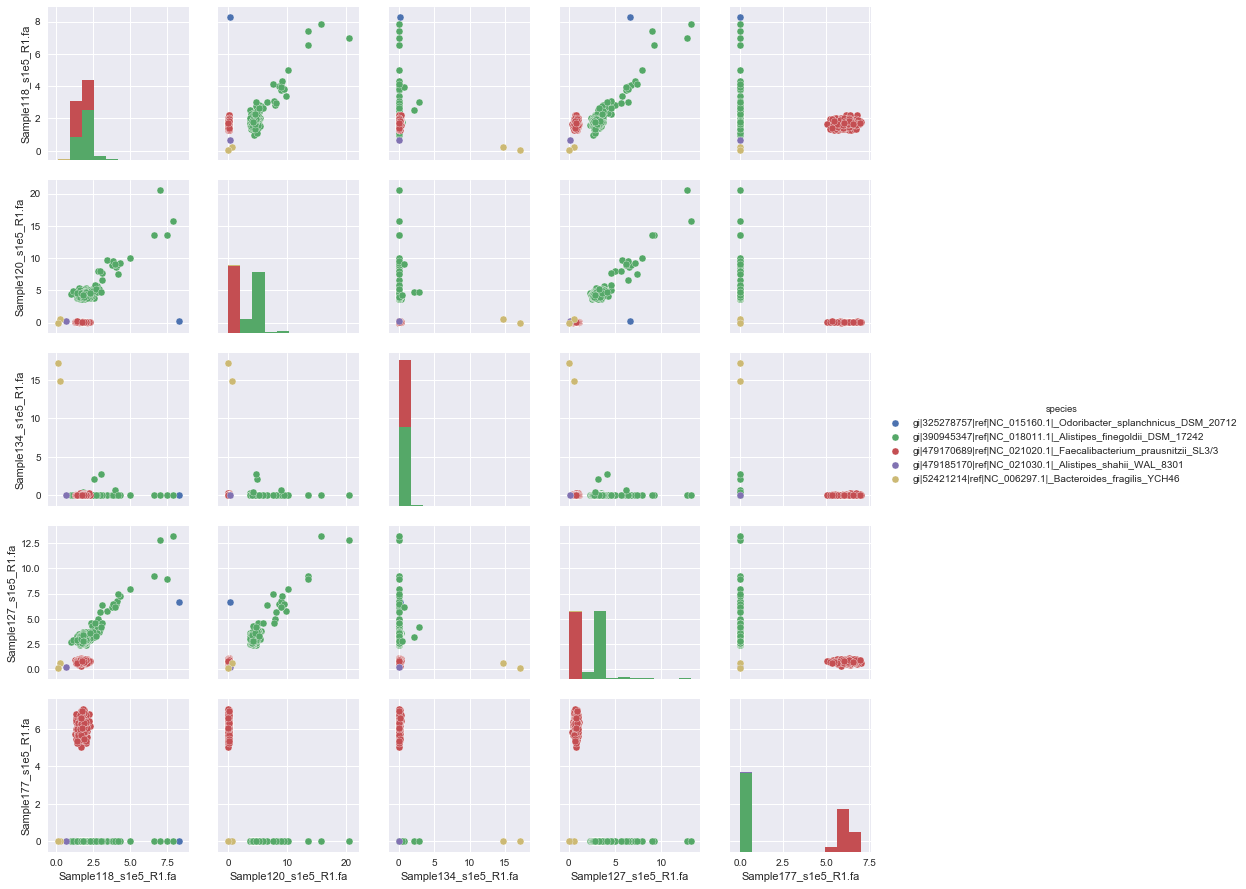

In [181]:
seaborn.pairplot(mean_df, hue='species')

In [152]:
median_df = pd.DataFrame.from_dict(results_median, orient='index')

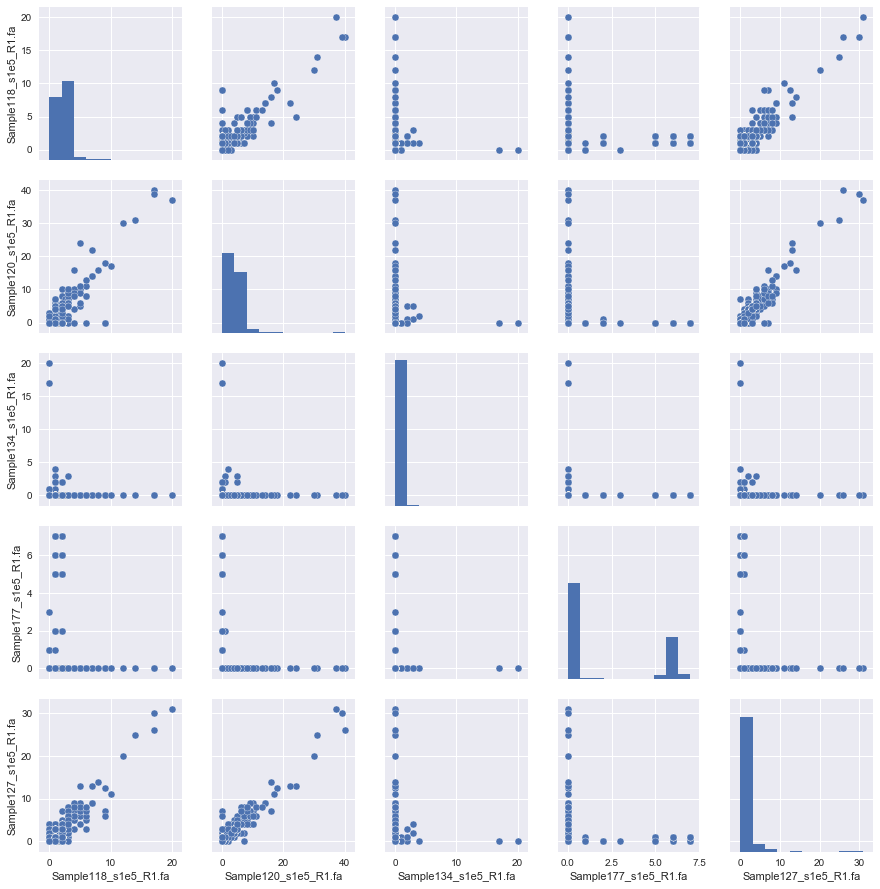

In [153]:
seaborn.pairplot(median_df)

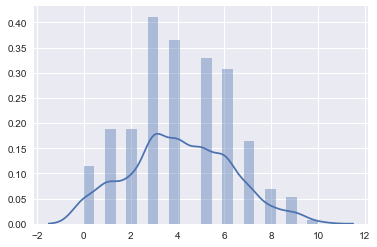

In [137]:
seaborn.distplot(values)

In [12]:
cov_arrays = bam_file.count_coverage(reference='NODE_1_length_2054_cov_17.474684', start=0, end=2053)

In [122]:
for ref_seq_d in bam_file.header['SQ']:
    

[{'LN': 2124, 'SN': 'NODE_1_length_2054_cov_17.474684'},
 {'LN': 16226, 'SN': 'NODE_2_length_16156_cov_8.219856'},
 {'LN': 15634, 'SN': 'NODE_3_length_15564_cov_8.154202'},
 {'LN': 533, 'SN': 'NODE_4_length_463_cov_71.041039'},
 {'LN': 10000, 'SN': 'NODE_9_length_28909_cov_10.362067.0'},
 {'LN': 18979, 'SN': 'NODE_9_length_28909_cov_10.362067.1'},
 {'LN': 256, 'SN': 'NODE_10_length_186_cov_4.327957'},
 {'LN': 223, 'SN': 'NODE_11_length_153_cov_12.470589'},
 {'LN': 625, 'SN': 'NODE_12_length_555_cov_14.255856'},
 {'LN': 6661, 'SN': 'NODE_13_length_6591_cov_8.574723'},
 {'LN': 708, 'SN': 'NODE_14_length_638_cov_8.811913'},
 {'LN': 3625, 'SN': 'NODE_15_length_3555_cov_8.369058'},
 {'LN': 710, 'SN': 'NODE_16_length_640_cov_19.335938'},
 {'LN': 187, 'SN': 'NODE_17_length_117_cov_22.692308'},
 {'LN': 14492, 'SN': 'NODE_18_length_14422_cov_8.414783'},
 {'LN': 1343, 'SN': 'NODE_19_length_1273_cov_24.035349'},
 {'LN': 1244, 'SN': 'NODE_20_length_1174_cov_71.271721'},
 {'LN': 252, 'SN': 'NODE_21

In [18]:
len(cov_arrays[0] + cov_arrays[1] + cov_arrays[2] + cov_arrays[3])

8212

In [128]:
np.sum?

In [131]:
len(cov_arrays)

4

In [132]:
len(cov_arrays[0])

2123

In [133]:
len(np.sum(cov_arrays, axis=0))

2123

In [24]:
len(np.add(cov_arrays[0], cov_arrays[1]))

2053

In [37]:
summed_cov = np.add(np.add(np.add(cov_arrays[0], cov_arrays[1]),cov_arrays[2]), cov_arrays[3])

In [34]:
cov_arrays2 = bam_file2.count_coverage(reference='NODE_1_length_2054_cov_17.474684', start=0, end=2053)

In [38]:
summed_cov2 = np.add(np.add(np.add(cov_arrays2[0], cov_arrays2[1]),cov_arrays2[2]), cov_arrays2[3])

In [47]:
df = pd.DataFrame({'col1': summed_cov, 'col2': summed_cov2})

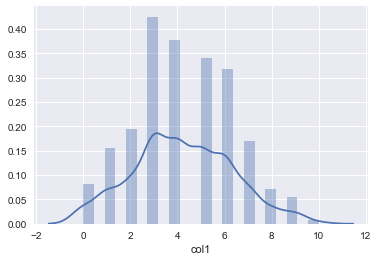

In [51]:
seaborn.distplot(df['col1'])

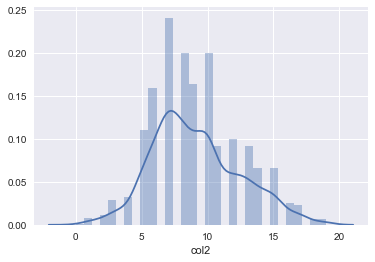

In [52]:
seaborn.distplot(df['col2'])

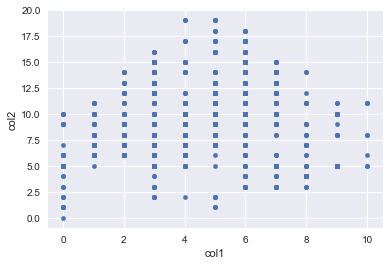

In [53]:
df.plot.scatter('col1', 'col2')

In [ ]:
c.

In [114]:
c = Counter()
nms = []
for read in bam_file2.fetch(reference='NODE_1_length_2054_cov_17.474684', start=0, end=2053):
    try:
        c.update([read.get_tag('XM')])
    except KeyError:
        print(read)

gi|479185170|ref|NC_021030.1|_Alistipes_shahii_WAL_8301_nr10139586_+_R1	69	0	1905	0	None	0	1905	100	TGCAATAACATTCTGATTATCAAATAAATTACCCCCCCCCCGTTGAAAAATCCAAAAAAAATAACATGTAATATTTTGTTTTTCAGGCAATTATCGCATA	array('B', [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40])	[('YT', 'UP')]


In [113]:
c = Counter()
nms = []
for read in bam_file2.fetch(reference='NODE_1_length_2054_cov_17.474684', start=0, end=2053):
    c.update([read.get_tag('XM')])

KeyError: "tag 'XM' not present"

In [99]:
read.get_tag('XM')

5

In [96]:
c

Counter({0: 141, 1: 30, 2: 10, 3: 8, 5: 1})

In [100]:
read.seq

'GCCGCCGAGGGAAAATATTATAAAGAGCAAACAGCTTTTGCGAGTTACCGCCTGAAAGTACGAACTTACTTTGAATATATTGTCGGACTGCTGATCTGCG'

In [101]:
read.get_reference_sequence()

'cgCGCCGAGGGgAAATATTATAAAGAGCAAACtGCTTTTGCGAGTTACCGCCTGAAAGTACGAACTTACTTTGAATATATTGTCGGACTGCTGATCTGCa'

In [102]:
print(read)

gi|479185170|ref|NC_021030.1|_Alistipes_shahii_WAL_8301_nr8235938_-_R2	145	0	948	23	100M	0	414	100	GCCGCCGAGGGAAAATATTATAAAGAGCAAACAGCTTTTGCGAGTTACCGCCTGAAAGTACGAACTTACTTTGAATATATTGTCGGACTGCTGATCTGCG	array('B', [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40])	[('AS', -30), ('XN', 0), ('XM', 5), ('XO', 0), ('XG', 0), ('NM', 5), ('MD', '0C0G9G20T66A0'), ('YS', -18), ('YT', 'DP')]


In [110]:
read.get_cigar_stats()

(array('I', [100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5]),
 array('I', [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [80]:
read.seq == read.get_reference_sequence()

False

In [81]:
read.seq

'GACCCCAACCGGATTCTGCGGCGCAGCACGCGGGCAAAATACGCTCTCTTGTATTCCGCGGCACTCGATAAAAATTATGTGGATGCCGATGATTATTCGC'

In [82]:
read.get_reference_sequence()

'GACCCCgACCGGATTCTGCGGCGCAGCACGCGGGCAAAATACGCTCTCTTGTATTCCGCGGCACTCGATAAAAATTATGTGGATGCCGATGATgATTCGC'

In [62]:
print(read)

gi|390945347|ref|NC_018011.1|_Alistipes_finegoldii_DSM_17242_nr5291445_-_R2	163	0	1	42	100M	0	331	100	CAAATCGAGCAAGAATTGTCTACTGCGACAAGATTGTTACGCATCGAACCGGACAGCTCGTTGCGCATCATCGAGAACATTGACCCCGACCGGATTCTGC	array('B', [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40])	[('AS', 0), ('XN', 0), ('XM', 0), ('XO', 0), ('XG', 0), ('NM', 0), ('MD', '100'), ('YS', -6), ('YT', 'CP')]


In [71]:
read.seq

'CAAATCGAGCAAGAATTGTCTACTGCGACAAGATTGTTACGCATCGAACCGGACAGCTCGTTGCGCATCATCGAGAACATTGACCCCGACCGGATTCTGC'

In [72]:
read.get_reference_sequence()

'CAAATCGAGCAAGAATTGTCTACTGCGACAAGATTGTTACGCATCGAACCGGACAGCTCGTTGCGCATCATCGAGAACATTGACCCCGACCGGATTCTGC'

In [78]:
read.get_tag('NM')

0

In [67]:
read.get_reference_sequence()

'CAAATCGAGCAAGAATTGTCTACTGCGACAAGATTGTTACGCATCGAACCGGACAGCTCGTTGCGCATCATCGAGAACATTGACCCCGACCGGATTCTGC'

In [210]:
original_data = pd.read_table("../../CONCOCT-test-data/concoct-output/original_data_gt1000.csv", sep=',')

In [212]:
len(original_data.columns)

154

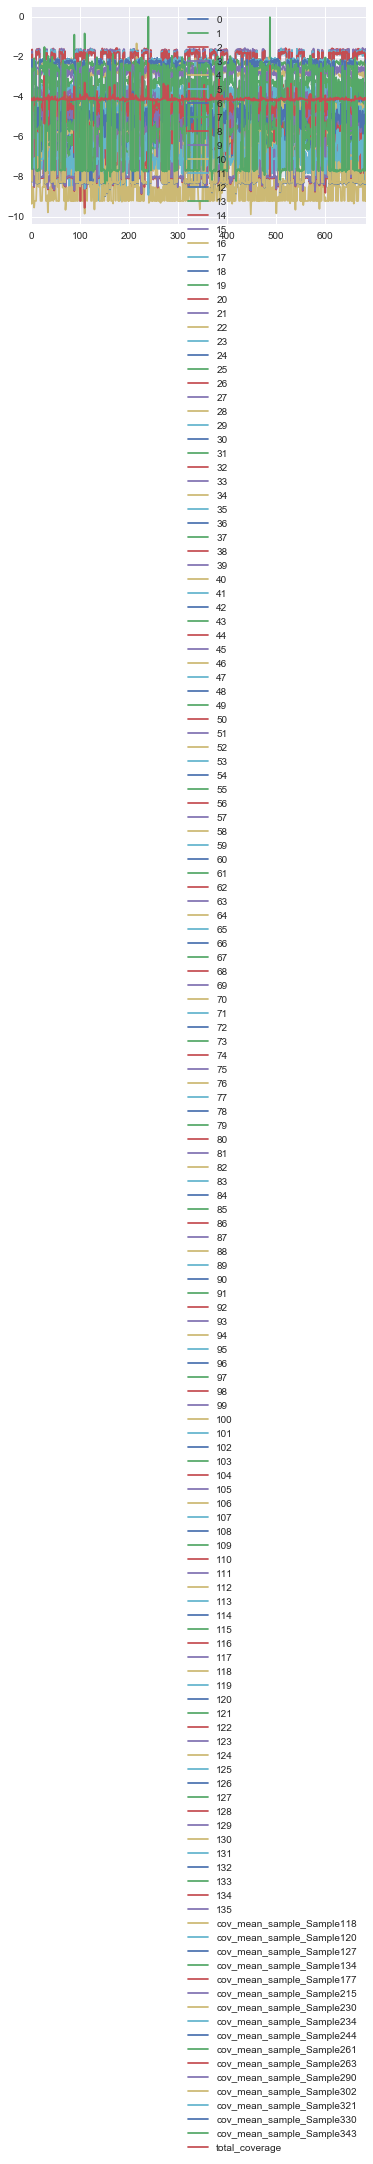

In [213]:
original_data[['cov_mean_sample_Sample118','cov_mean_sample_Sample120']].plot()

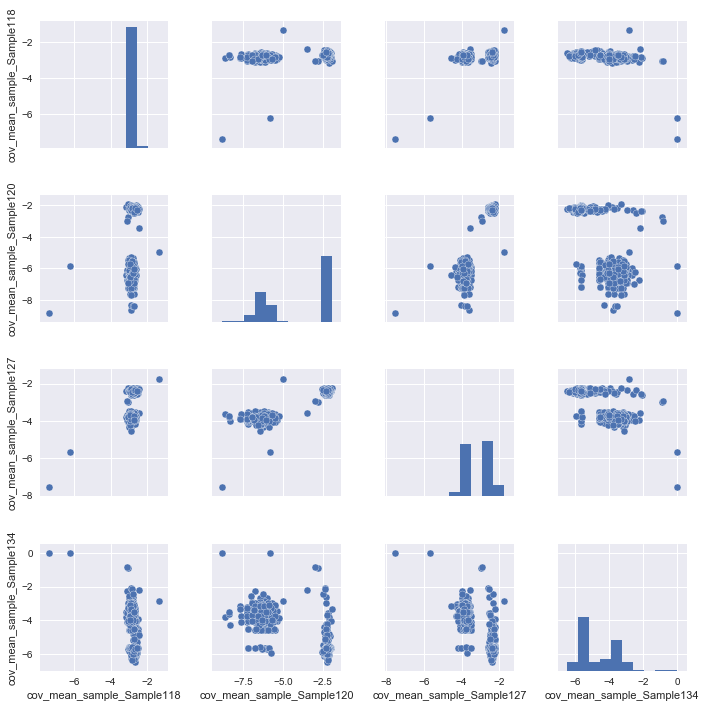

In [218]:
seaborn.pairplot(original_data[['cov_mean_sample_Sample118','cov_mean_sample_Sample120', 'cov_mean_sample_Sample127', 'cov_mean_sample_Sample134']])

In [219]:
coverage_table = pd.read_table("../../CONCOCT-test-data/concoct-input/concoct_inputtableR.tsv")

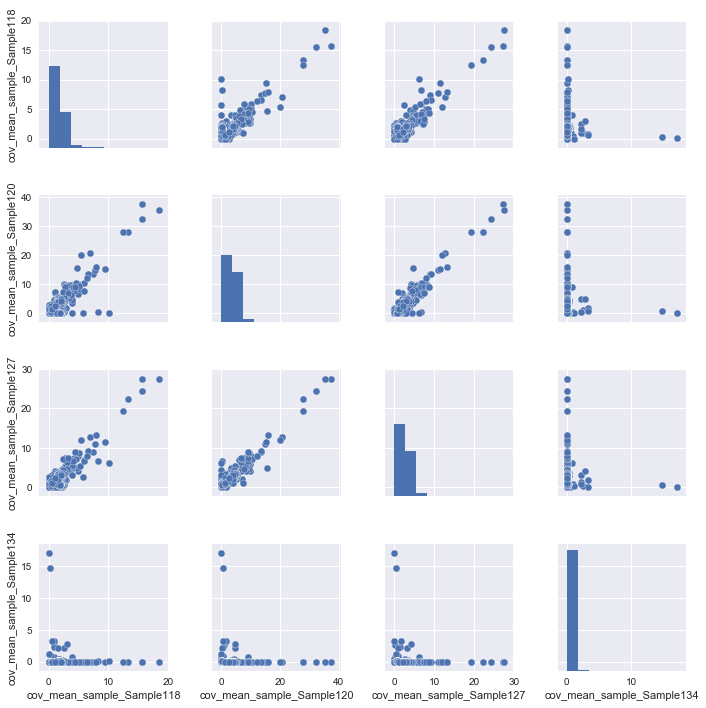

In [220]:
seaborn.pairplot(coverage_table[['cov_mean_sample_Sample118','cov_mean_sample_Sample120', 'cov_mean_sample_Sample127', 'cov_mean_sample_Sample134']])

In [223]:
coverage_table['species'] = coverage_table['contig'].apply(lambda x: species_d[x])

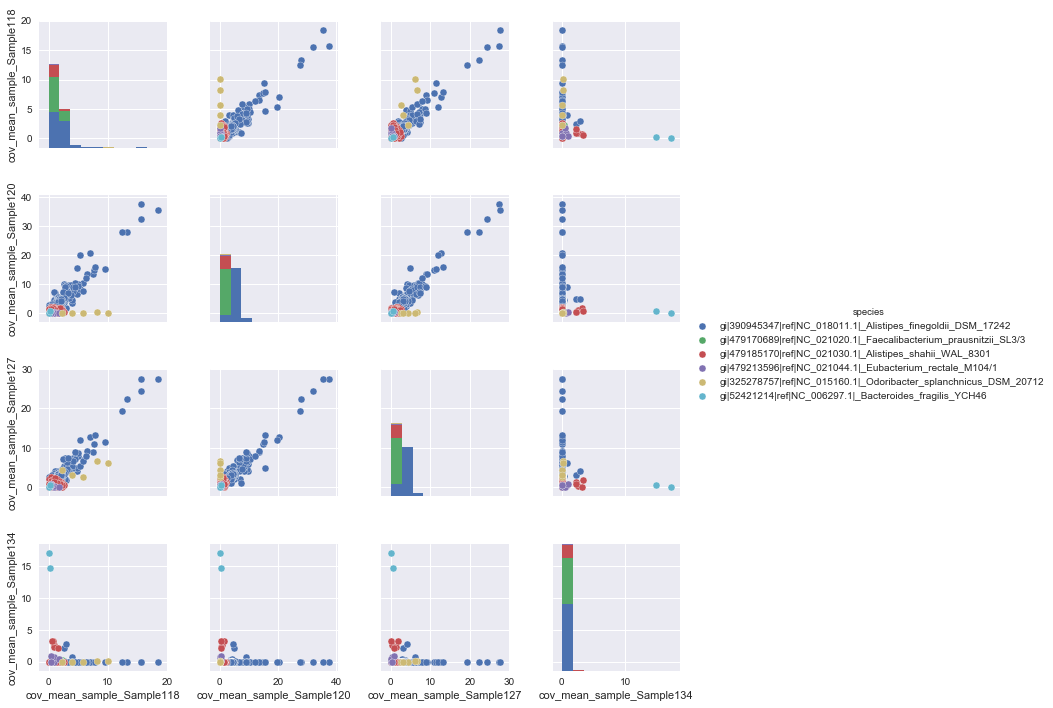

In [224]:
seaborn.pairplot(coverage_table[['cov_mean_sample_Sample118','cov_mean_sample_Sample120', 'cov_mean_sample_Sample127', 'cov_mean_sample_Sample134', 'species']], hue='species')

In [228]:
original_data['species'] = original_data['Unnamed: 0'].apply(lambda x: species_d[x])

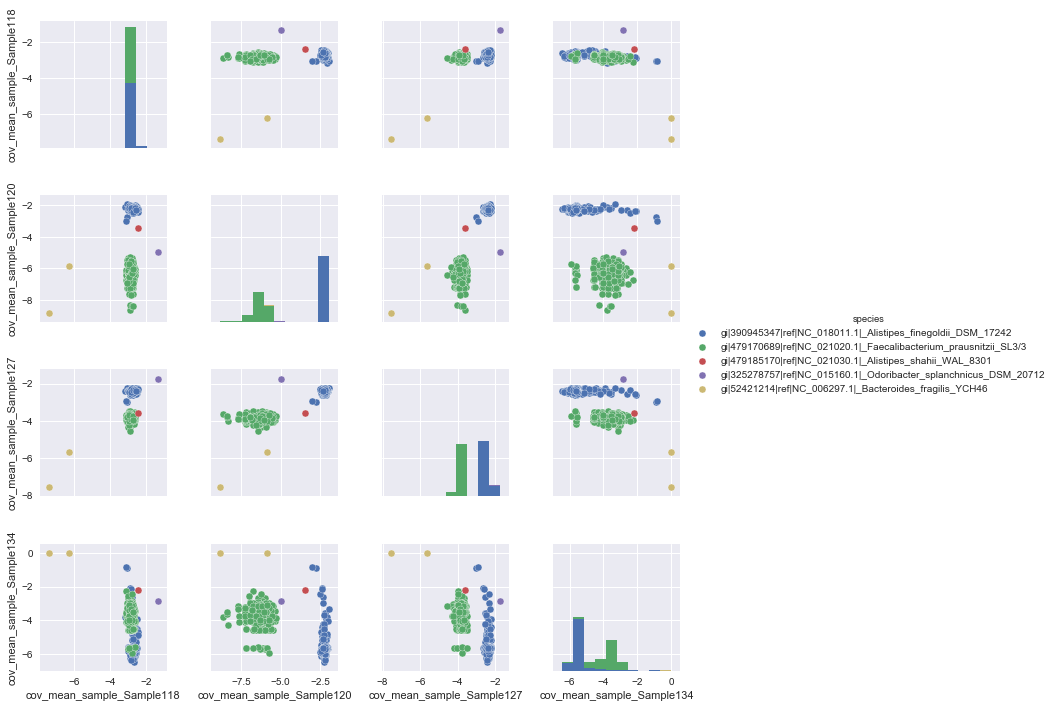

In [229]:
seaborn.pairplot(original_data[['cov_mean_sample_Sample118','cov_mean_sample_Sample120', 'cov_mean_sample_Sample127', 'cov_mean_sample_Sample134', 'species']], hue='species')